In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\varun\Downloads\spam.csv", encoding='latin-1')
data = data.rename(columns={"v1": "Class", "v2": "Message"})

In [3]:
# Preview dataset
print(data.head())
print(data.info())

  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Tokenize, remove stopwords, and preprocess
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

data['Processed_Message'] = data['Message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
print(data.columns)


Index(['class', 'message'], dtype='object')


In [6]:
data.columns = data.columns.str.strip()


In [7]:
data = data.rename(columns={"v1": "Class", "v2": "Message"})


In [8]:
# Rename columns to a consistent format
data = data.rename(columns={"class": "Class", "message": "Message"})

# Verify the renaming
print(data.columns)

# Preprocess the dataset
data['Processed_Message'] = data['Message'].apply(preprocess_text)


Index(['Class', 'Message'], dtype='object')


Steps to Resolve
1. Display the Exact Column Names
Use this code to identify potential issues with column names:

python
Copy code


In [10]:
print(data.columns.tolist())


['Class', 'Message', 'Processed_Message']


 Strip Whitespace from Column Names

In [11]:
data.columns = data.columns.str.strip()
print(data.columns)


Index(['Class', 'Message', 'Processed_Message'], dtype='object')


Rename Columns Explicitly
If the column names are still causing issues, rename them explicitly:

In [12]:
data = data.rename(columns={'class': 'Class', 'message': 'Message'})
print(data.columns)


Index(['Class', 'Message', 'Processed_Message'], dtype='object')


Verify and Access the Correct Column
After renaming:

In [13]:
# Apply preprocessing
data['Processed_Message'] = data['Message'].apply(preprocess_text)


Troubleshooting Code

In [14]:
# Display actual column names
print("Columns:", data.columns.tolist())

# Strip whitespace and rename
data.columns = data.columns.str.strip()
if 'message' in data.columns:
    data['Processed_Message'] = data['message'].apply(preprocess_text)
elif 'Message' in data.columns:
    data['Processed_Message'] = data['Message'].apply(preprocess_text)
else:
    print("Error: 'message' column not found!")


Columns: ['Class', 'Message', 'Processed_Message']


# Split the Dataset

In [19]:
X = data['Processed_Message']
y = data['Class'].map({'ham': 0, 'spam': 1})  # Encode target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Tokenization and Padding

In [20]:
# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=5000)  # Limit vocab size
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure equal length
max_len = 50  # Choose based on the dataset
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


# Build and Compile the RNN Model

In [21]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\varun\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [22]:
history = model.fit(
    X_train_padded, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8539 - loss: 0.4393 - val_accuracy: 0.8621 - val_loss: 0.4018
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8592 - loss: 0.4155 - val_accuracy: 0.8621 - val_loss: 0.4120
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8728 - loss: 0.3891 - val_accuracy: 0.8621 - val_loss: 0.4016
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8652 - loss: 0.4003 - val_accuracy: 0.8621 - val_loss: 0.4015
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8719 - loss: 0.3885 - val_accuracy: 0.8621 - val_loss: 0.4025
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8598 - loss: 0.4084 - val_accuracy: 0.9092 - val_loss: 0.3066
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9632 - loss: 0.1701 - val_accuracy: 0.9596 - val_loss: 0.1588
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9664 - loss: 0.1363 - val_accu

# Evaluate the Model

In [23]:
# Evaluate on the test set
y_pred = model.predict(X_test_padded).round().astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.9650224215246637
Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       965
        Spam       0.89      0.84      0.87       150

    accuracy                           0.97      1115
   macro avg       0.93      0.91      0.92      1115
weighted avg       0.96      0.97      0.96      1115



# Analyze and Discuss Performance
Plot the training/validation loss and accuracy to observe training trends.

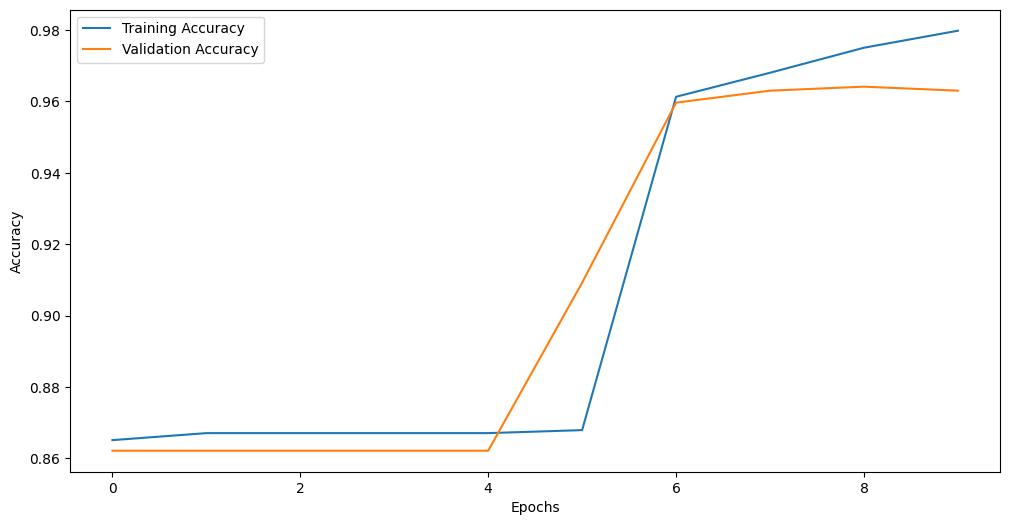

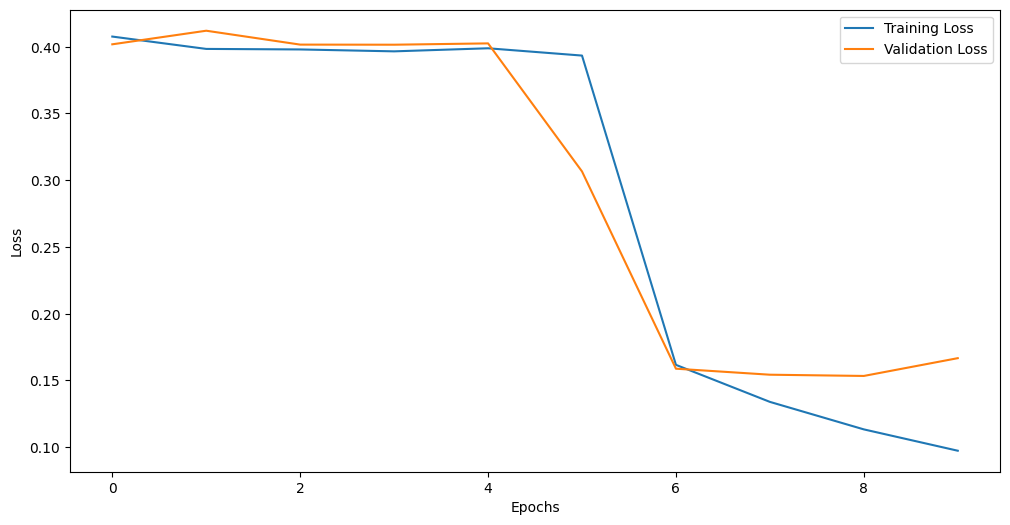

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
